In [1]:
import pandas as pd
import numpy as np

data_path = './0.csv'

df_sample = pd.read_csv(data_path, nrows=5)
df_sample

,Unnamed: 0,0
0,0,[ 2.4820118 -0.97476006 -4.27486 1.649986...
1,1,[ 1.306514 0.6067919 -4.951896 1.236016...
2,2,[ 1.3065140e+00 6.0679191e-01 -4.9518962e+00 ...
3,3,[ 2.3916643 0.20941967 -4.0494895 -0.03...
4,4,[ 2.4820118 -0.97476006 -4.27486 1.649986...


In [2]:
def parse_vector(vector_str):
    vector_str = vector_str.strip('[]')
    vector_str = vector_str.replace('\n', '')
    vector = np.fromstring(vector_str, sep=' ')
    return vector

df_full = pd.read_csv(data_path)
vectors = df_full['0'].apply(parse_vector)

vector_array = np.stack(vectors.values)

vector_array.shape

(38049, 280)

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Downscaling using PCA
pca = PCA(n_components=50)
vector_array_pca = pca.fit_transform(vector_array)

In [4]:
# t-SNE is better
tsne = TSNE(n_components=2)
vector_array_tsne = tsne.fit_transform(vector_array_pca)

In [6]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)
clusters = optics.fit_predict(vector_array_tsne)

/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


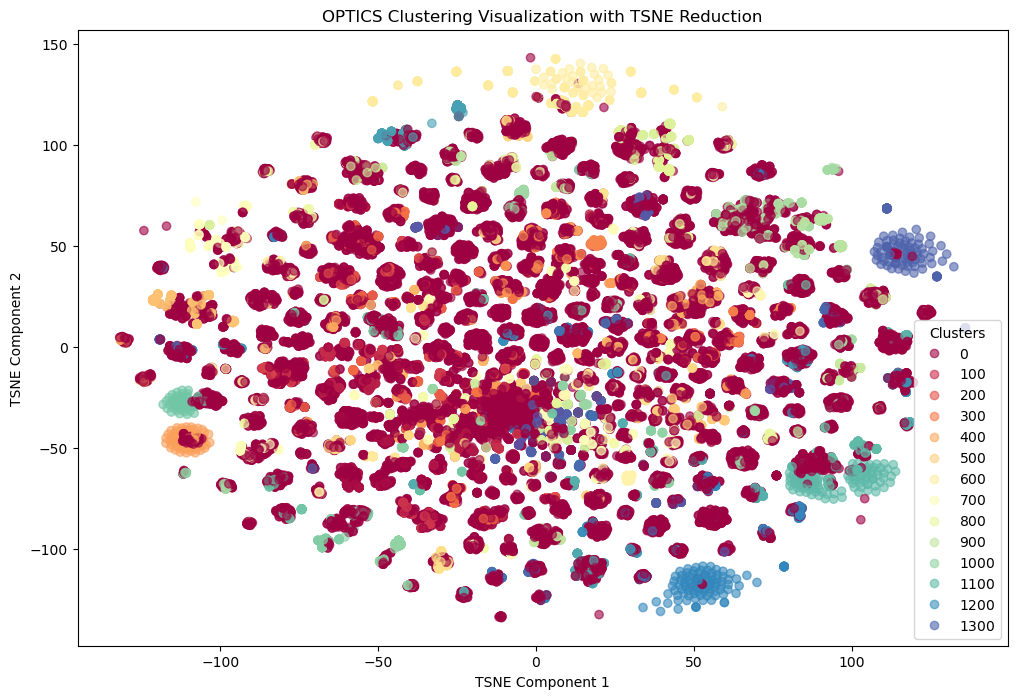

In [8]:
from sklearn.cluster import OPTICS
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

optics_clustering = OPTICS(min_samples=5).fit(vector_array)

optics_labels = optics_clustering.labels_

tsne = TSNE(n_components=2, random_state=0)
reduced_data = tsne.fit_transform(vector_array)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=optics_labels, cmap='Spectral', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('OPTICS Clustering Visualization with TSNE Reduction')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

# Assuming `vector_array` is your dataset and `optics_labels` are your OPTICS cluster labels
silhouette_avg = silhouette_score(vector_array, optics_labels)
print(f"Average silhouette score: {silhouette_avg}")

Average silhouette score: -0.16223988623919333


In [11]:
optics_clustering_pca = OPTICS(min_samples=5).fit(vector_array_pca)

optics_labels_pca = optics_clustering_pca.labels_

silhouette_avg = silhouette_score(vector_array_pca, optics_labels_pca)
print(f"Average silhouette score: {silhouette_avg}")

/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Average silhouette score: -0.1767625379274742


## tsne is better

In [12]:
optics_clustering_tsne = OPTICS(min_samples=5).fit(vector_array_tsne)

optics_labels_tsne = optics_clustering_tsne.labels_

silhouette_avg = silhouette_score(vector_array_tsne, optics_labels_tsne)
print(f"Average silhouette score: {silhouette_avg}")

/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Average silhouette score: 0.25913041830062866


In [13]:
optics_clustering_tsne = OPTICS(min_samples=3).fit(vector_array_tsne)

optics_labels_tsne = optics_clustering_tsne.labels_

silhouette_avg = silhouette_score(vector_array_tsne, optics_labels_tsne)
print(f"Average silhouette score: {silhouette_avg}")

/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Average silhouette score: 0.3425712585449219


In [14]:
optics_clustering_tsne = OPTICS(min_samples=2).fit(vector_array_tsne)

optics_labels_tsne = optics_clustering_tsne.labels_

silhouette_avg = silhouette_score(vector_array_tsne, optics_labels_tsne)
print(f"Average silhouette score: {silhouette_avg}")

/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Average silhouette score: 0.46013420820236206


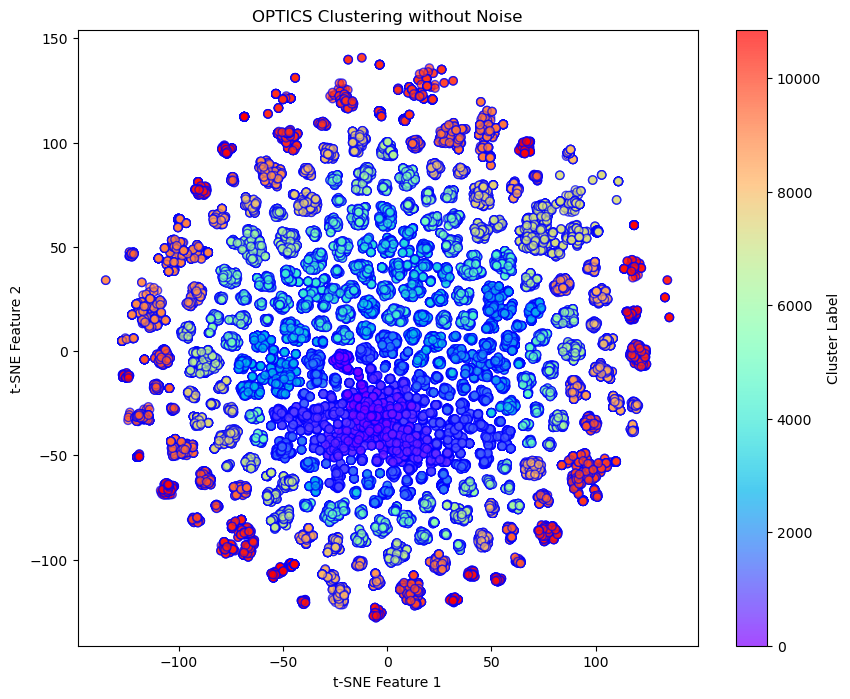

In [15]:
mask_noise = optics_labels_tsne != -1

plt.figure(figsize=(10, 8))
plt.scatter(
    vector_array_tsne[mask_noise, 0], 
    vector_array_tsne[mask_noise, 1], 
    c=optics_labels_tsne[mask_noise], 
    cmap='rainbow', 
    alpha=0.7, 
    edgecolors='b'
)
plt.title("OPTICS Clustering without Noise")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()